In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#### Task 1: Descriptive Statistics 

- Review the features you explored in stage I (at least 3 features per team, at least two features are numerical - continuous/discrete); if there is no numerical feature, revisit the original dataset and select a suitable and meaningful numerical feature.
- Categorical features can still be included, but they must be encoded into numeric form (e.g., gender → 0/1)

In [84]:
df = pd.read_csv('newdata (2).csv')

- PART A: Calculate the selected features mean, median, variance, skewness and kurtosis. 

In [85]:
# calculated means
mean_tempo = df['tempo'].mean()
print(f"The mean tempo is: {mean_tempo:.4f}")
mean_durat_ms = df['duration_ms'].mean()
print(f"The mean song duration in milliseconds is: {mean_durat_ms:.4f}")
mean_winner = df['winner'].mean()
print(f"The average number of award-winning songs is: {mean_winner:.4f}")

The mean tempo is: 122.3081
The mean song duration in milliseconds is: 228090.1387
The average number of award-winning songs is: 0.0278


In [86]:
#calculated medians
median_tempo = df['tempo'].median()
print(f"The median tempo is: {median_tempo}")
median_durat_ms = df['duration_ms'].median()
print(f"The median duration in milliseconds is: {median_durat_ms}")
median_winner = df['winner'].median()
print(f"The median winning song is: {median_winner}") #i.e., the middle song in the dataset did not win an award

The median tempo is: 122.02
The median duration in milliseconds is: 213013.0
The median winning song is: 0.0


In [87]:
#calculated variance with x = df['column_name'].var()
var_tempo = df['tempo'].var()
print(f"The variance of tempo: {var_tempo:.4f}")
var_durat_ms = df['duration_ms'].var()
print(f"The variance of song duration: {var_durat_ms:.4f}")
var_winner = df['winner'].var()
print(f"The variance of award-winning songs: {var_winner:.4f}")

The variance of tempo: 878.8351
The variance of song duration: 11252108517.4830
The variance of award-winning songs: 0.0271


In [88]:
#calculated skewness with x = df['column_name'].skew()
skew_tempo = df['tempo'].skew()
print(f"The skew of song tempo is: {skew_tempo:.4f}")
skew_durat_ms = df['duration_ms'].skew()
print(f"The skew of song duration in seconds is: {skew_durat_ms:.4f}")
skew_winner = df['winner'].skew()
print(f"The skew of winning songs is: {skew_winner:.4f}")

The skew of song tempo is: 0.3204
The skew of song duration in seconds is: 10.9618
The skew of winning songs is: 5.7409


In [89]:
#calculated kurtosis with x = df['column_name'].kurtosis()
kurt_tempo = df['tempo'].kurtosis()
print(f"The skew of song tempo is: {kurt_tempo:.4f}")
kurt_durat_ms = df['duration_ms'].kurtosis()
print(f"The skew of song duration in seconds is: {kurt_durat_ms:.4f}")
kurt_winner = df['winner'].kurtosis()
print(f"The skew of winning songs is: {kurt_winner:.4f}")

The skew of song tempo is: -0.3786
The skew of song duration in seconds is: 351.7612
The skew of winning songs is: 30.9580


- PART B
- 1. identify type of data (**categorical or numerical**) of each feature. if numerical, **continuous or discrete**?
  2. summarize your findings

**- Tempo Feature: Numerical & Continuous**

Based off the median value for tempo (which is in BPM) and our returned value for skewness, we can see that the average BPM of 120-122 BPM is extremely common and consistent across the dataset. A negative kurtosis value tells us that there aren't many outliers in the spread. 

**- Duration_ms Feature: Numerical & Continuous**

At first glance, due to how large the kurtosis and skewness values are, it would look like the duration of songs is extremely spread out, with extreme outliers and peak values. However, due to the dataset recording time in milliseconds, even large values between rows on the duration feature are likely only a few seconds. Based off the distance between the mean and median, we can suggest that the data is skewed right because of the larger mean value.
    
**- Winner Feature: Categorical**

From our first calculation of the mean of winning songs, we can see that songs winning awards is the outlier value, as opposed to not winning. This in turn influences the returned value we get calculating the winner feature's kurtosis, which has a relatively high value in spite of there only being two possible values for the winner feature. We should note to not base any inferences strongly off of elements like median when it comes to the winner feature, because it again only has two possible values.
  

#### Task 2: Distribution Fitting 

- PART A: Select one suitable numerical feature from task 1. Propose a theoretical distribution (Normal, Binomial, Poisson, Exponential, Geometric, etc.) and explain why you choose it.

**- Chosen Numerical Feature: Tempo**

**- Proposed Theoretical Distribution: Normal Distribution**
- We chose this distribution for the Tempo Feature based off of its values for the mean and median. Because they are so close to each other in value, they are best-suited to a Normal Distribution.

- PART B: Plot histogram of your feature, overlay a smooth curve of the fitted theoretical distribution. Discuss how your data fits the distribution.

Text(0, 0.5, 'Frequency')

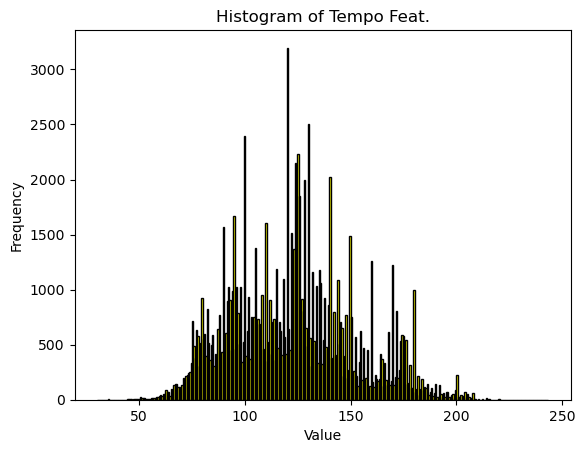

In [99]:
tempo = df['tempo']
plt.hist(tempo, bins=338, color="yellow", edgecolor="black")
plt.title("Histogram of Tempo Feat.")
plt.xlabel("Value")
plt.ylabel("Frequency")

#### Task 3: Point Estimate
- PART A: Randomly select 100 samples from the feature selected in Task 2, caculate the sample mean and variance. Compare with the population mean and variance.

In [126]:
sample = tempo.sample(n=100)
print(sample.mean(), " ", sample.var())

119.40987000000004   685.5299258516164


Both the sample mean and sample variance are extremely close to the population mean and variance (122 and 878, respectively). In the case of the mean, where they are nearly the same value,  the sample is representative of the population as a whole. In the case of the variance, the sample variance is high, similarly to the population. This means there's a large dispersion of numbers in the sample. 

- PART B: Repeat the random sampling 3 times and show how sample mean/variance vary due to randomness. Discuss your findings.

In [137]:
sample_2 = tempo.sample(n=100)
print(sample_2.mean(), " ", sample_2.var())
sample_3 = tempo.sample(n=100)
print(sample_3.mean(), " ", sample_3.var())
sample_4 = tempo.sample(n=100)
print(sample_4.mean(), " ", sample_4.var())

122.36865000000002   695.6633544722225
121.16050000000001   723.1116896868687
127.40277   914.5247764011108


In the case of the mean, every random sample returns very close values to the population mean. This means that any random sample would be representative of the population mean. In the case of the variance, there is a greater dispersion of values, roughly between the 600-1000 range. Since the population variance is a value of 878, 